In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile
path = "/content/drive/MyDrive/Colab Notebooks/archive.zip"

#unzipping
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall("/content/")

print("Unzipped successfully!")

Unzipped successfully!


In [ ]:
import os
for file in os.listdir('/content/'):
  print(file)

.config
amazon.csv
drive
sample_data


In [ ]:
import pandas as pd
df = pd.read_csv('/content/amazon.csv')
df.head(1)

,Text,label
0,This is the best apps acording to a bunch of ...,1


In [ ]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19996 entries, 0 to 19995
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    19996 non-null  object
 1   label   19996 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 312.6+ KB


Index(['Text', 'label'], dtype='object')

In [ ]:
df['label'].value_counts()

,count
label,
1,15230
0,4766


In [ ]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
def preprocess_text(text):

  #remove punctuation and numbers
  text = re.sub(r"[^a-zA-Z]", " ", text)

  #lowercase
  text = text.lower()

  #tokenize
  tokens = word_tokenize(text)

  #remove stopwords
  tokens = [word for word in tokens if word not in stop_words]

  #lemmatize
  tokens = [lemmatizer.lemmatize(word) for word in tokens]

  #join tokens back into string
  text = " ".join(tokens)

  return text

In [ ]:
df["Clean_Text"] = df["Text"].apply(preprocess_text)

In [ ]:
#convert to TF-IDF vectors
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=3000, ngram_range=(1, 2))
X = vectorizer.fit_transform(df["Clean_Text"])
y = df["label"]

In [ ]:
from sklearn.utils import resample

# Split into two subsets
df_major = df[df["label"] == 1]
df_minor = df[df["label"] == 0]

# Oversample minority class
df_minority_upsampled = resample( df_minor, replace=True, n_samples=len(df_major), random_state=42)

# Combine
df_balanced = pd.concat([df_major, df_minority_upsampled])

# Recreate features and labels
df_balanced["Clean_Text"] = df_balanced["Text"].apply(preprocess_text)
X = vectorizer.fit_transform(df_balanced["Clean_Text"])
y = df_balanced["label"]

In [ ]:
#Train-test-split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

model = MultinomialNB()
params = {"alpha": [0.1, 0.5, 1.0]}
grid = GridSearchCV(model, params, cv=5, scoring="accuracy")
grid.fit(X_train, y_train)

best_model = grid.best_estimator_

Accuracy: 0.8890347997373604
Classification:
               precision    recall  f1-score   support

    Negative       0.88      0.90      0.89      3046
    Positive       0.90      0.88      0.89      3046

    accuracy                           0.89      6092
   macro avg       0.89      0.89      0.89      6092
weighted avg       0.89      0.89      0.89      6092



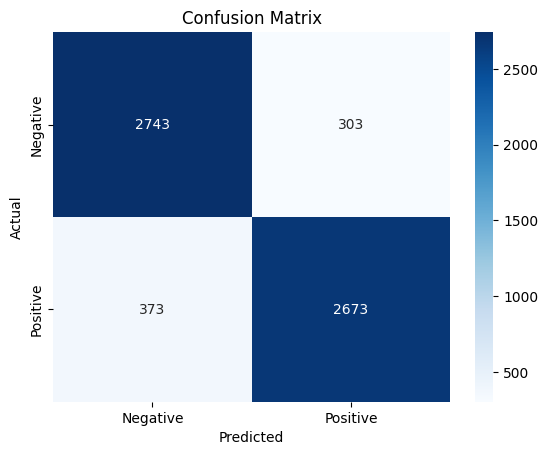

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = best_model.predict(X_test)

target_names = ["Negative", "Positive"]

#accuracy
print("Accuracy:",accuracy_score(y_test, y_pred))

#classification
print("Classification:\n",classification_report(y_test, y_pred, target_names=target_names))

import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
import pickle

# Save best model
with open('sentiment_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

# Save vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

In [ ]:
from google.colab import files
files.download('sentiment_model.pkl')
files.download('tfidf_vectorizer.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>